# GARCH

Let's just play around a little bit

In [5]:
import numpy as np
import pandas as pd
import math
import arch
from typing import Literal

# local modules
from data_cleaning.import_data import import_data
from utils.plots import *
from utils.statistics import *

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
fx_pairs =[
    'USDRUB',
    'USDZAR',
    'USDBRL',
    'EURUSD',
    'USDJPY',
    'GBPUSD'
]
dfs = { pair : import_data(fx_pair=pair) for pair in fx_pairs }

In [79]:
df = import_data(fx_pair='USDRUB')

## Descriptive Statistics

In [7]:
pd.set_option('display.max_rows', None)
for pair, df in dfs.items():
    description = df['log_ret'].describe(percentiles=None)
    print(pair.upper())
    print(description)
    print(f"Skewness : {df['log_ret'].skew():.3f}")
    print(f"Excess kurtosis: {df['log_ret'].kurtosis()-3:.3f}")
    print(f"Mean (normalized) bid-ask spread: {df['normalized_bid_ask_spread'].mean(skipna=True):.3f}")
    print(f"Number of observations: {len(df.dropna()):.0f}")
    print('---------------------------')

USDRUB
count    5760.000000
mean        0.000180
std         0.007844
min        -0.173462
25%        -0.002269
50%         0.000000
75%         0.002220
max         0.170009
Name: log_ret, dtype: float64
Skewness : 0.555
Excess kurtosis: 85.732
Mean (normalized) bid-ask spread: 0.106
Number of observations: 4429
---------------------------
USDZAR
count    5760.000000
mean        0.000157
std         0.010755
min        -0.066299
25%        -0.006023
50%        -0.000180
75%         0.005918
max         0.154965
Name: log_ret, dtype: float64
Skewness : 0.838
Excess kurtosis: 6.938
Mean (normalized) bid-ask spread: 0.308
Number of observations: 5740
---------------------------
USDBRL
count    5760.000000
mean        0.000183
std         0.010466
min        -0.103436
25%        -0.005072
50%         0.000000
75%         0.005328
max         0.071116
Name: log_ret, dtype: float64
Skewness : 0.062
Excess kurtosis: 2.813
Mean (normalized) bid-ask spread: 0.067
Number of observations: 4800
-

In [59]:
for key in dfs.keys():
    df = dfs[key]
    df.dropna(inplace=True)
    print(f"{key} has sample start: {df.index[0]}  --> {len(df)} observations")
    

USDRUB has sample start: 2005-03-03 00:00:00  --> 4429 observations
USDZAR has sample start: 2000-02-23 00:00:00  --> 5740 observations
USDBRL has sample start: 2003-10-01 00:00:00  --> 4800 observations
EURUSD has sample start: 2000-03-15 00:00:00  --> 5725 observations
USDJPY has sample start: 2000-02-23 00:00:00  --> 5740 observations
GBPUSD has sample start: 2000-02-23 00:00:00  --> 5740 observations


################
 Normality test 
################
p = 0.00000
The null of normality can be rejected


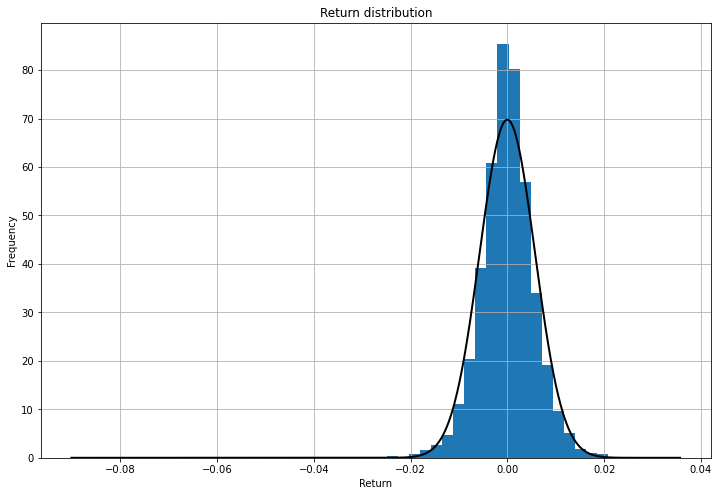

#########################
 Are returns fat-tailed? 
#########################
p = 0.00000
The null of no-excess kurtosis can be rejected and distribution is fat-tailed
#############
 Jarque-Bera 
#############
p = 0.00000
The null of no skewness and kurtosis=3 can be rejected
#################################################
 Are returns statistically signifcant from zero? 
#################################################
t=-0.398, p=0.69068
The null of zero-returns cannot be rejected
#################
 Autocorrelation 
#################
1 lag(s): p-value = 0.015312627315951035
2 lag(s): p-value = 0.052172224338049536
3 lag(s): p-value = 0.11002689214551536
4 lag(s): p-value = 0.19583060498172838
5 lag(s): p-value = 0.051680841645319636


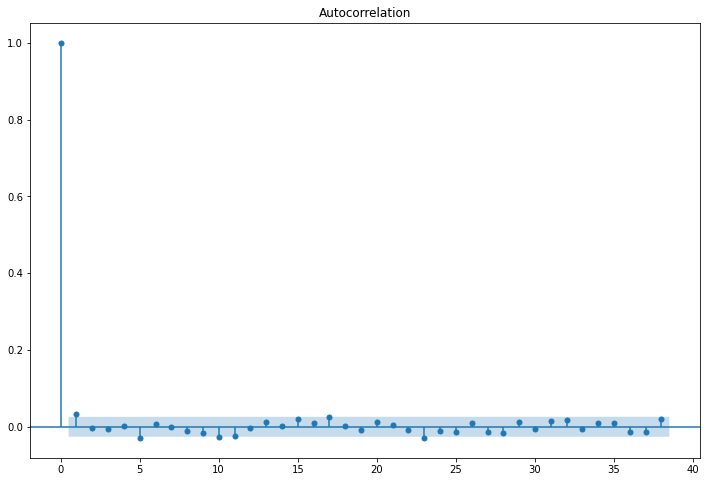

##############
 Stationarity 
##############
ADF Statistic: -73.361748
p-value: 0.000000
The null of non-stationarity can be rejected
##################
 Homoscedasticity 
##################
p = 0.00000
The null of homoscedasticity can be rejected


In [60]:
get_desctiptive_stats(df,plots=True)

# Plots

## Returns

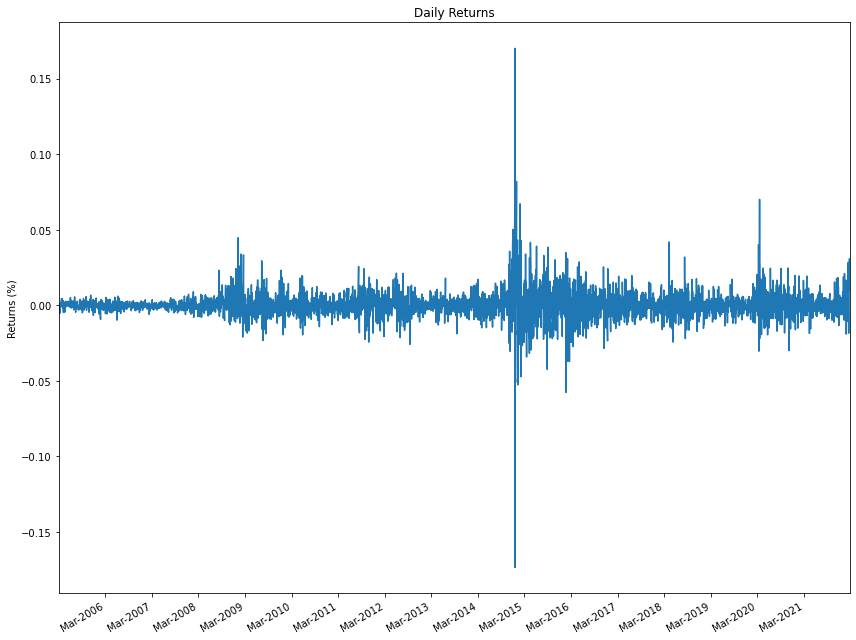

In [69]:
plot_returns(df=df)

## Implied Vol

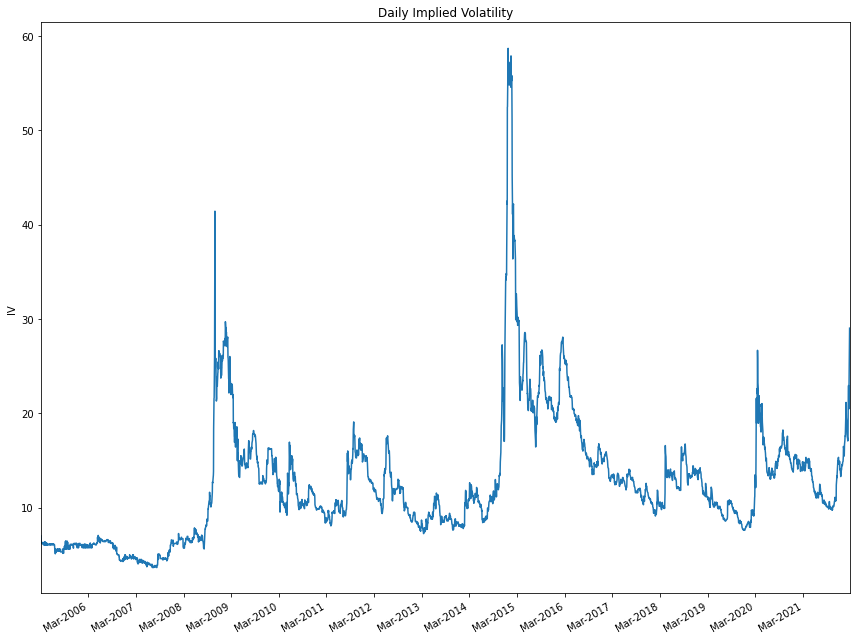

In [70]:
plot_iv(df=df,months_out='3m')

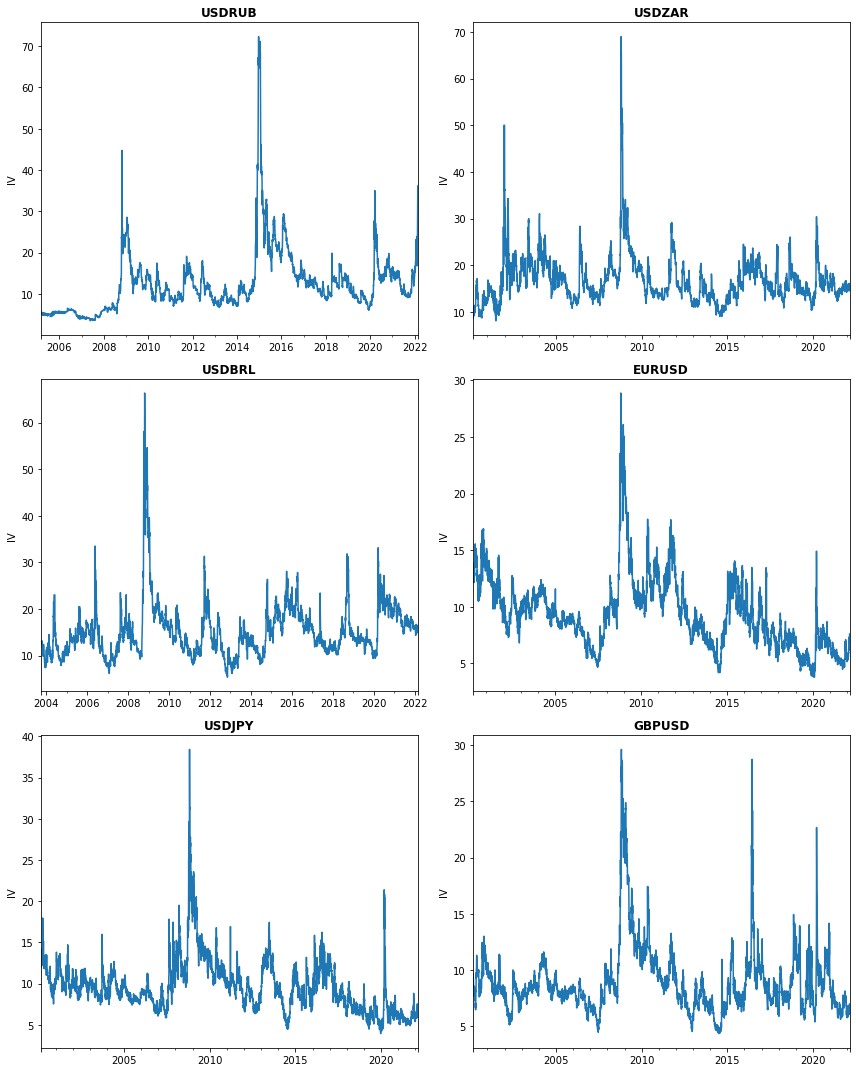

In [67]:
plot_grid(df_dict=dfs, series='v1m',cols=2)  

## Bid-ask spreads (pips)

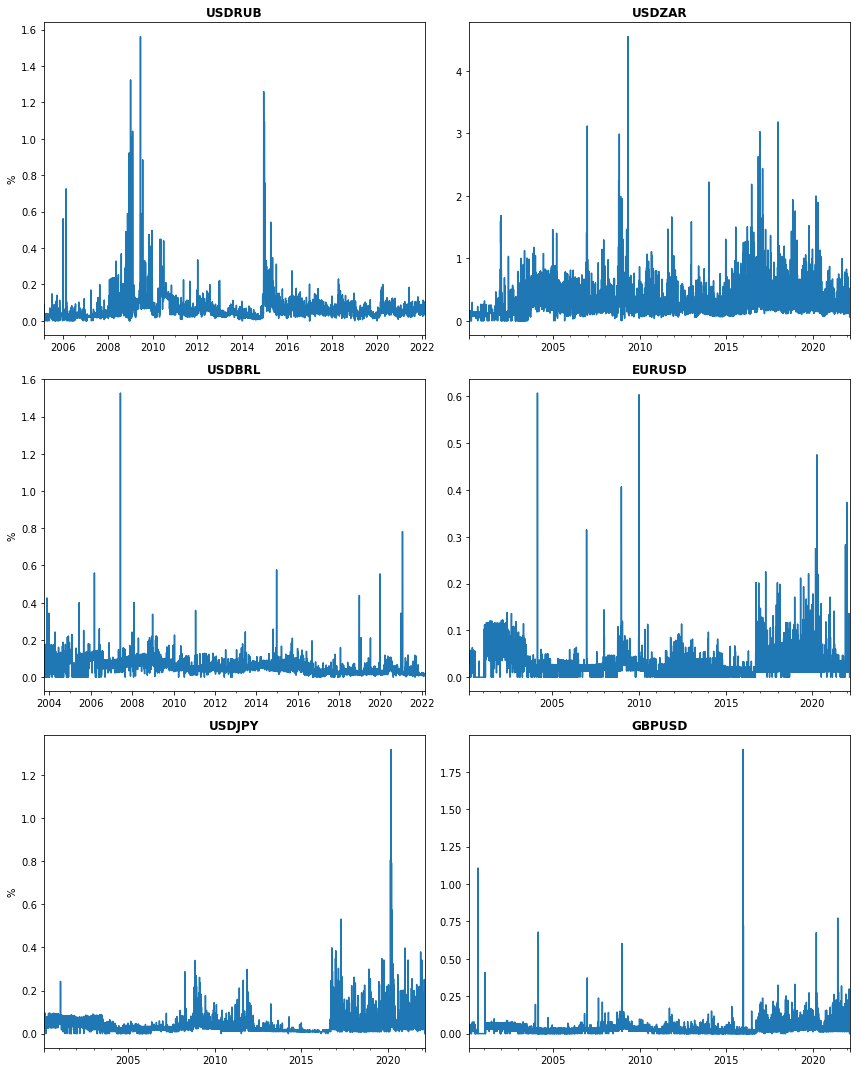

In [29]:
plot_grid(df_dict=dfs, series='normalized_bid_ask_spread',cols=2)

I get that sometimes they can get out of wack, but a spread of <-500 on EURUSD seems odd... 

In [89]:
# lowest EURUSD bid-ask spread
timestamp = dfs['EURUSD'].dropna()['bid_ask_spread_pips'].idxmin()
dfs['EURUSD'].dropna().loc[timestamp]

v1m                            15.350000
v3m                            14.100000
v1y                            13.250000
px_last                         0.883392
px_bid                          0.935016
px_ask                          0.883002
log_ret                         0.000706
rolling_21d_realized_stdev     11.554595
bid_ask_spread_pips          -520.141553
Name: 2000-09-27 00:00:00, dtype: float64

In [90]:
# highest USDRUB bid-ask spread
timestamp = dfs['USDRUB'].dropna()['bid_ask_spread_pips'].idxmax()
dfs['USDRUB'].dropna().loc[timestamp]

v1m                             66.722500
v3m                             52.432500
v1y                             40.455000
px_last                         60.636200
px_bid                          60.254300
px_ask                          61.018000
log_ret                         -0.173462
rolling_21d_realized_stdev      54.553778
bid_ask_spread_pips           7637.000000
Name: 2014-12-17 00:00:00, dtype: float64

## Returns and IV grid

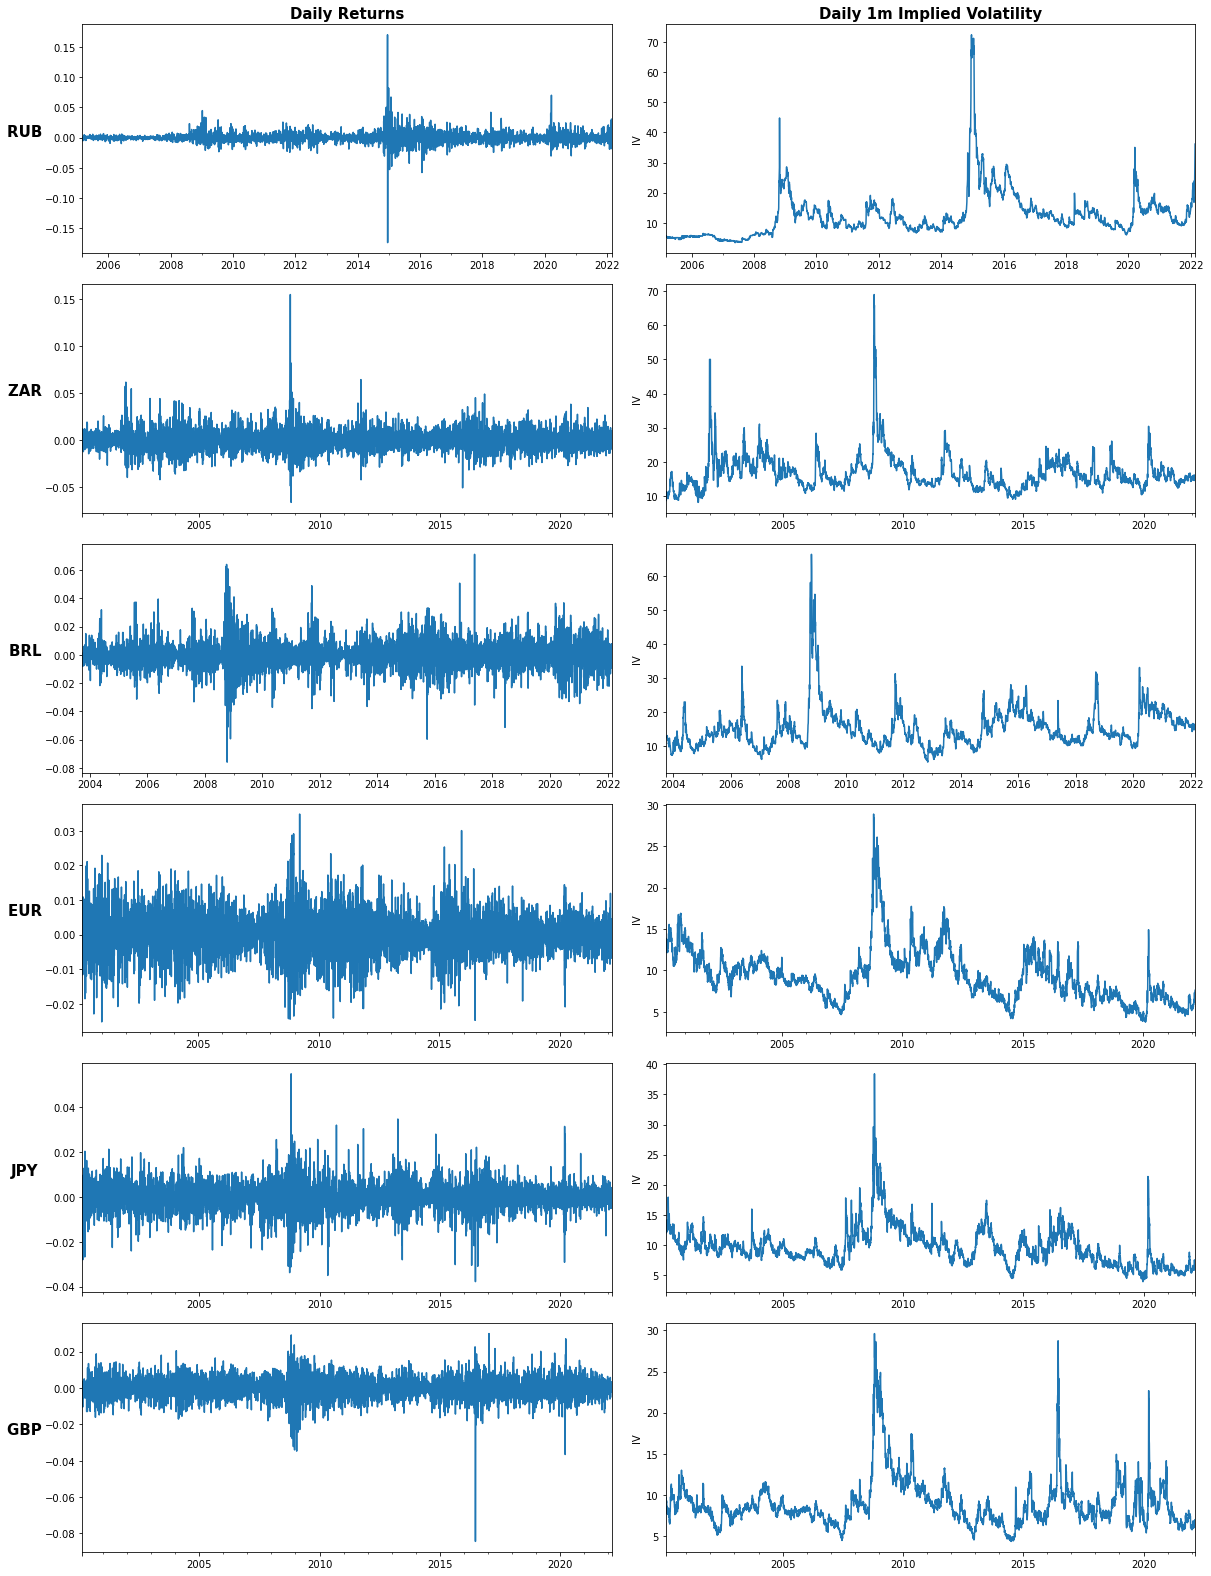

In [68]:
plot_returns_and_vol(df_dict=dfs, vol_period='1m')

## Return distribution

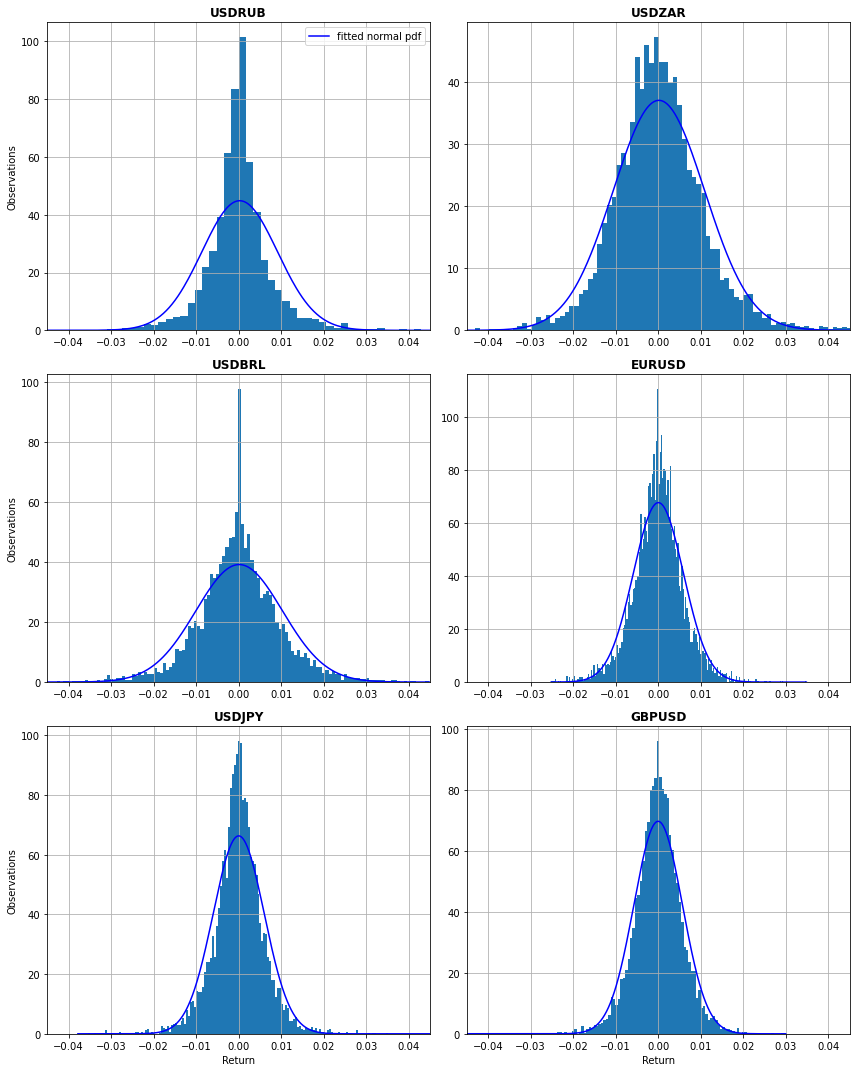

In [25]:
plot_return_distribution(df_dict=dfs, bins = 200)

In [22]:
mu, std = stats.norm.fit(df['log_ret'].dropna()) 
print(mu)
print(std)

-3.3415035496250766e-05
0.005718362944837381


In [16]:
degrees_of_freedom, loc, scale = stats.t.fit(df['log_ret'].dropna()) 


In [18]:
degrees_of_freedom

5.234344724079527

In [19]:
loc

2.149707793050584e-05

In [20]:
scale

0.004453293557166962

In [17]:
df['log_ret']

Dates
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21         NaN
2000-01-24         NaN
2000-01-25         NaN
2000-01-26   -0.002957
2000-01-27   -0.000492
2000-01-28   -0.011898
2000-01-31   -0.002427
2000-02-01   -0.000808
2000-02-02   -0.003868
2000-02-03   -0.007213
2000-02-04   -0.003348
2000-02-07    0.003828
2000-02-08    0.008344
2000-02-09    0.003390
2000-02-10   -0.004356
2000-02-11   -0.010091
2000-02-14   -0.003500
2000-02-15    0.004935
2000-02-16    0.007368
2000-02-17    0.000804
2000-02-18   -0.004815
2000-02-21   -0.000480
2000-02-22    0.007551
2000-02-23   -0.005468
2000-02-24   -0.002243
2000-02-25   -0.003036
2000-02-28    0.000319
2000-02-29   -0.010478
2000-03-01    0.003797
2000-